In [2]:
#studying the format of the overall dataset, types of all variables, checking and cleaning the dataset.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
from folium import plugins
from folium.plugins import HeatMap

data = pd.read_csv('../Source/2018_listings.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
id                                48620 non-null int64
name                              48592 non-null object
host_id                           48620 non-null int64
host_name                         48513 non-null object
neighbourhood_group               48620 non-null object
neighbourhood                     48620 non-null object
latitude                          48620 non-null float64
longitude                         48620 non-null float64
room_type                         48620 non-null object
price                             48620 non-null int64
minimum_nights                    48620 non-null int64
number_of_reviews                 48620 non-null int64
last_review                       38069 non-null object
reviews_per_month                 37981 non-null float64
calculated_host_listings_count    48620 non-null int64
availability_365                  48620 non-null int64

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,16457286,Quite room in Shared Apartment,11796099,Shanell,Brooklyn,Bedford-Stuyvesant,40.685559,-73.940650,Private room,38,14,2,2017-02-08,0.16,1,0
1,1356652,COZY ROOM IN BEDFORD-STUYVESANT,4508795,Darlene,Brooklyn,Bedford-Stuyvesant,40.683917,-73.934671,Private room,90,2,2,2017-09-05,0.05,1,365
2,775016,Reggae Den Sub Level Apartment,4088378,Karin,Brooklyn,Bedford-Stuyvesant,40.687344,-73.938055,Private room,90,2,1,2017-02-11,0.09,1,365
3,773497,Great spot in Brooklyn,4081688,Santiago,Brooklyn,Bedford-Stuyvesant,40.694073,-73.945514,Shared room,200,1,0,NaN,NaN,1,365
4,8468835,Private room in Brooklyn,6518093,Mathilde,Brooklyn,Bedford-Stuyvesant,40.679685,-73.907642,Private room,50,1,2,2015-09-29,0.07,1,0


In [4]:
# some data having null values that we need to clean up
data.isnull().sum()

id                                    0
name                                 28
host_id                               0
host_name                           107
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10551
reviews_per_month                 10639
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
#Both last_review and reviews_per_month have over 10k missing values in the dataset
(data['last_review'].isnull()==data['reviews_per_month'].isnull()).all()

False

In [6]:
#for missing values in reviews_per_month, I will assign them as zero.
data.loc[data['reviews_per_month'].isnull(),'reviews_per_month']=0

In [7]:

len(set(data['id']))

48620

In [8]:

len(set(data['host_id']))

40276

In [9]:

data.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [10]:
#checking numeric variables
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.862000e+04,48620.000000,48620.000000,48620.00000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,4.134467e+07,40.730151,-73.954121,145.37571,4.009317,18.460880,1.110026,1.733237,125.367400
std,4.581516e+07,0.053538,0.042863,207.21978,12.035686,34.290893,1.742189,2.214444,141.183854
min,7.200000e+01,40.499794,-74.240843,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.931947e+06,40.691562,-73.983543,68.00000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,2.262553e+07,40.723624,-73.956272,100.00000,2.000000,4.000000,0.460000,1.000000,68.000000
75%,6.101158e+07,40.763872,-73.938691,170.00000,4.000000,20.000000,1.600000,2.000000,268.000000
max,1.670075e+08,40.911708,-73.711750,10000.00000,1250.000000,516.000000,90.730000,35.000000,365.000000


In [11]:
data=data[data['price']>0]

In [12]:
data=data[data['minimum_nights']<=365]

In [13]:

data.reset_index(drop=True,inplace=True)

In [14]:
#Using describe() can help me understand the range of possible values for each variable

#Analysis:

#in this dataset, there are some abnormalities. The first one is that there are records with “price” = 0 which is 
#unrealistic as this means no need to pay to stay. So these records should be removed.

#Any records with “minimum_nights” larger than 365 will also be removed.

data.info()

#data after cleannig below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48565 entries, 0 to 48564
Data columns (total 12 columns):
host_id                           48565 non-null int64
neighbourhood_group               48565 non-null object
neighbourhood                     48565 non-null object
latitude                          48565 non-null float64
longitude                         48565 non-null float64
room_type                         48565 non-null object
price                             48565 non-null int64
minimum_nights                    48565 non-null int64
number_of_reviews                 48565 non-null int64
reviews_per_month                 48565 non-null float64
calculated_host_listings_count    48565 non-null int64
availability_365                  48565 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.4+ MB


In [15]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'Manhattan'],
      dtype=object)

In [16]:

set(data['neighbourhood_group'])

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [17]:
#distribution of price in each neighbourhood_group and across all.
data.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,852.0,87.420188,139.477721,17.0,47.0,65.0,90.0,2500.0
Brooklyn,20124.0,118.318525,181.604967,10.0,60.0,90.0,142.0,10000.0
Manhattan,22201.0,183.449664,228.158761,10.0,90.0,140.0,200.0,9999.0
Queens,5076.0,98.254531,177.135198,10.0,50.0,74.0,109.0,10000.0
Staten Island,312.0,128.564103,312.202335,17.0,50.0,75.0,120.0,5000.0


In [18]:
#Analysis:
#The numbers of Airbnb is not even
#Most Airbnb houses are in either Manhattan or Brooklyn.
#However, these two regions are also the highest prices among the five regions
#A possible reason is that because the demands in these regions are high, 
#causing more hosts to rent out their rooms or apartments.

In [19]:

len(set(data['neighbourhood']))

220

In [21]:
#The following breakdown show more accurately on the price

data.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,129.711462,70.103757,61.925000
Brooklyn,171.498113,75.978196,54.138021
Manhattan,239.938584,106.103207,86.579606
Queens,144.769950,73.906746,51.910638
Staten Island,202.423611,65.812121,34.666667


In [22]:
#Analysis:
#In average, you can get a private room in Brooklyn but you can’t even afford a shared room in Manhattan.
# Staten island is the lowest because its mostly for buying the houses.

In [23]:
#Considerations:

# I Decided to use the HeatMap because I want to see which intersections of the categorical values
#have higher concentration of the data compared to the others. (As a preset before starting the jupyter user should run the following 
# commnad cmd: pip install folium)

In [37]:
ny_map = folium.Map(location=[40.7, -74],zoom_start =50)
data_loc= data[['latitude','longitude']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

In [34]:
#MapAnalysis:
#There is a large red area in Manhattan and Brooklyn

In [26]:
#Performing small breakdown per each neibourhood

for gp in set(data['neighbourhood_group']):
    print(data.loc[data['neighbourhood_group']==gp,].groupby(['neighbourhood_group','neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price', 'mean'),ascending=False).head())
    print()

                                    price            
                                    count        mean
neighbourhood_group neighbourhood                    
Queens              College Point      17  254.941176
                    Bellerose           9  168.222222
                    Jamaica Estates    17  163.764706
                    Bayside            54  154.185185
                    Arverne            70  138.528571

                                  price            
                                  count        mean
neighbourhood_group neighbourhood                  
Brooklyn            Dyker Heights    28  411.357143
                    Sea Gate          6  342.500000
                    DUMBO            40  192.900000
                    Columbia St      45  192.466667
                    Cobble Hill     108  185.537037

                                      price            
                                      count        mean
neighbourhood_group neighbourhood     

In [27]:
#Analysis:
# The above showing the top 5 most expensive neighborhoods in each group.

In [28]:
#Next variable to be studied is “minimum_nights”
data.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,852.0,2.866197,4.301879,1.0,1.0,2.0,3.0,60.0
Brooklyn,20124.0,3.939376,7.414614,1.0,1.0,2.0,4.0,365.0
Manhattan,22201.0,4.101212,9.758811,1.0,1.0,2.0,4.0,365.0
Queens,5076.0,3.329393,7.275565,1.0,1.0,2.0,3.0,200.0
Staten Island,312.0,2.788462,3.868430,1.0,1.0,2.0,3.0,30.0


In [29]:
#Analysis:
#As all records with ‘minimum_nights’ larger than 365 were removed already, the max is only 365.
#As shown, over 25% of Airbnb place only require 1 night and over half only 
#require 2 or 3 nights which fits in the original principle of Airbnb service, a short term accommodation.

In [30]:
#Next i will analyse reviews_per_month since this can eliminate the effect of duration listing on Airbnb.
for gp in set(data['neighbourhood_group']):
    print(gp)
    print(data[data['neighbourhood_group']==gp][['price','reviews_per_month']].corr())
    print()

Queens
                      price  reviews_per_month
price              1.000000          -0.052445
reviews_per_month -0.052445           1.000000

Brooklyn
                     price  reviews_per_month
price              1.00000           -0.02513
reviews_per_month -0.02513            1.00000

Manhattan
                      price  reviews_per_month
price              1.000000          -0.041843
reviews_per_month -0.041843           1.000000

Bronx
                      price  reviews_per_month
price              1.000000          -0.099351
reviews_per_month -0.099351           1.000000

Staten Island
                      price  reviews_per_month
price              1.000000          -0.142307
reviews_per_month -0.142307           1.000000



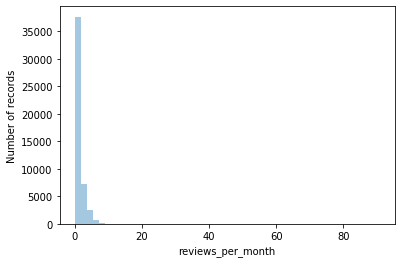

In [35]:
sns.distplot(data['reviews_per_month'],kde=False)
plt.ylabel('Number of records')
plt.show()